<a href="https://colab.research.google.com/github/thisishasan/slda/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Title: Heart Failure Analysis and Prediction

## Dataset

### Dataset Source
#### Heart Failure Clinical Records Dataset originally source from UC Irvine Machine Learning Repository [https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records]

### Features Information
Thirteen (13) clinical features:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- creatinine phosphokinase  (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction  (percentage)
- high blood pressure: if the patient has hypertension (boolean)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- [target] death event: if the patient died during the follow-up period (boolean)

### Download Dataset

In [ ]:
!wget -nc 'https://raw.githubusercontent.com/thisishasan/slda/refs/heads/main/dataset.csv'

--2025-02-04 17:20:59--  https://raw.githubusercontent.com/thisishasan/slda/refs/heads/main/dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12231 (12K) [text/plain]
Saving to: ‘dataset.csv’

dataset.csv         100%[===================>]  11.94K  --.-KB/s    in 0s      

2025-02-04 17:21:00 (24.9 MB/s) - ‘dataset.csv’ saved [12231/12231]



### Importing Libraries



In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.stats import mannwhitneyu, ttest_ind, skew, kurtosis, shapiro, kstest, anderson, chi2_contingency
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

### Load dataset into dataframe

In [ ]:
file_path = os.path.join('dataset.csv')
df = pd.read_csv(file_path)

### Initial Analysis on the dataset



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int64  
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  death_event               299 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 30.5 KB


In [ ]:
print("Shape of Dataset:", df.shape)

Shape of Dataset: (299, 13)


In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.836120,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


## Preparation for Exploratory Data Analysis (EDA)

### Checking missing values

In [ ]:
df.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


> Not found any missing values in the dataset



### Checking unique values in the dataset

In [ ]:
df.nunique()

,0
age,46
anaemia,2
creatinine_phosphokinase,208
diabetes,2
ejection_fraction,17
high_blood_pressure,2
platelets,176
serum_creatinine,40
serum_sodium,27
sex,2


### Seggregate Numerical and Categorical variables by number of unique values.

#### Higher unique values represents Numerical Variables and Lower unique values represents Categorical Variables

In [ ]:
numerical_vars = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
categorical_vars = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

### Set Target Variable 'death_event'

In [ ]:
target_vars = ['death_event']

## Exploratory Data Analysis (EDA)

### Analyzing class imbalance in Target Variable



In [ ]:
death_event_counts = df['death_event'].value_counts()
death_event_counts

,count
death_event,
0,203
1,96


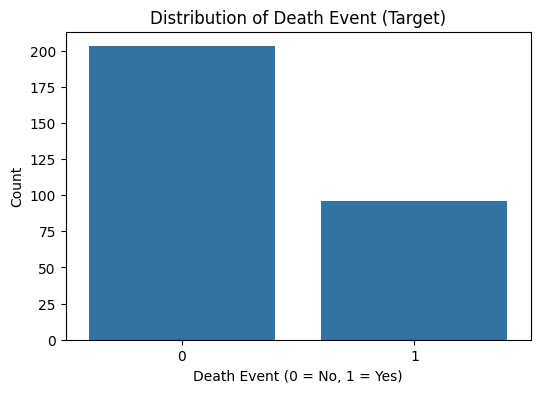

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='death_event', data=df)
plt.title("Distribution of Death Event (Target)")
plt.xlabel("Death Event (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

In [ ]:
death_event_percentage = df['death_event'].value_counts(normalize=True) * 100
death_event_percentage_rounded = death_event_percentage.round(2)
death_event_percentage_rounded

,proportion
death_event,
0,67.89
1,32.11


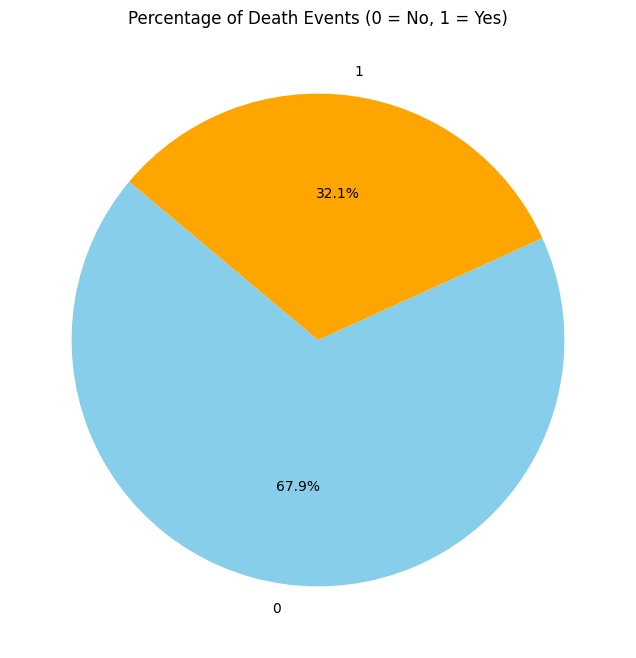

In [ ]:
plt.figure(figsize=(8, 8))
death_event_percentage_rounded.plot.pie(autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange'])
plt.title('Percentage of Death Events (0 = No, 1 = Yes)')
plt.ylabel('')
plt.show()



> Percentage / Counts of Death Patients is lower than Alive Patients Clinical Records that means Target Variable is imbalanced.



### Univariate Analysis of Numerical Variables



In [ ]:
numerical_analysis = {}

for column in numerical_vars:
    data = df[column].dropna()
    skewness = data.skew()
    kurtois = data.kurt()
    numerical_analysis[column] = {
        "Min": np.min(data),
        "Max": np.max(data),
        "Mean": np.mean(data),
        "Median": np.median(data),
        "Mode": data.mode()[0] if not data.mode().empty else None,
        "Range": np.ptp(data),
        "Variance": np.var(data, ddof=1),
        "Standard Deviation": np.std(data, ddof=1),
        "Quantiles": np.percentile(data, [25, 50, 75]),
        "Skewness": skewness,
        "Skewness Type": "Symmetric (Normal)" if skewness == 0 else "Right-Skewed (Positive)" if skewness > 0 else "Left-Skewed (Negative)",
        "Kurtosis": kurtois,
        "Type of Kurtosis": "Leptokurtic (High)" if kurtois > 3 else "Platykurtic (Low)" if kurtois < 3 else "Mesokurtic (Normal)",
    }

numerical_analysis_df = pd.DataFrame(numerical_analysis)
display(numerical_analysis_df.T)

,Min,Max,Mean,Median,Mode,Range,Variance,Standard Deviation,Quantiles,Skewness,Skewness Type,Kurtosis,Type of Kurtosis
age,40,95,60.83612,60.0,60,55,141.486476,11.894809,"[51.0, 60.0, 70.0]",0.422496,Right-Skewed (Positive),-0.185191,Platykurtic (Low)
creatinine_phosphokinase,23,7861,581.839465,250.0,582,7838,941458.571457,970.287881,"[116.5, 250.0, 582.0]",4.46311,Right-Skewed (Positive),25.149046,Leptokurtic (High)
ejection_fraction,14,80,38.083612,38.0,35,66,140.063455,11.834841,"[30.0, 38.0, 45.0]",0.555383,Right-Skewed (Positive),0.041409,Platykurtic (Low)
platelets,25100.0,850000.0,263358.029264,262000.0,263358.03,824900.0,9565668749.448879,97804.236869,"[212500.0, 262000.0, 303500.0]",1.462321,Right-Skewed (Positive),6.209255,Leptokurtic (High)
serum_creatinine,0.5,9.4,1.39388,1.1,1.0,8.9,1.070211,1.03451,"[0.9, 1.1, 1.4]",4.455996,Right-Skewed (Positive),25.828239,Leptokurtic (High)
serum_sodium,113,148,136.625418,137.0,136,35,19.469956,4.412477,"[134.0, 137.0, 140.0]",-1.048136,Left-Skewed (Negative),4.119712,Leptokurtic (High)
time,4,285,130.26087,115.0,187,281,6023.965276,77.614208,"[73.0, 115.0, 203.0]",0.127803,Right-Skewed (Positive),-1.212048,Platykurtic (Low)


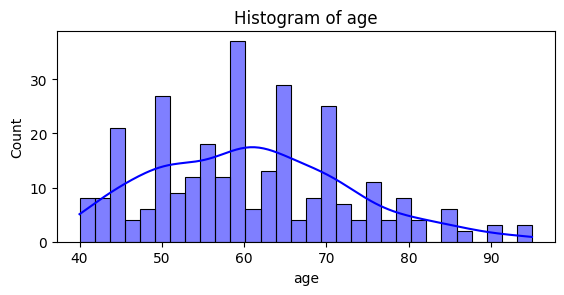

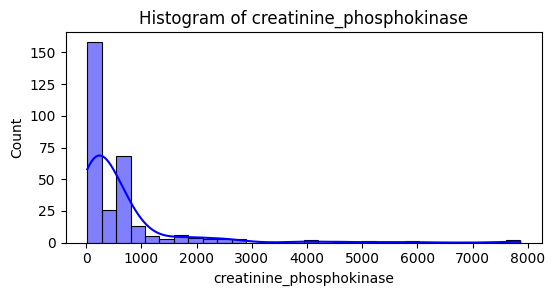

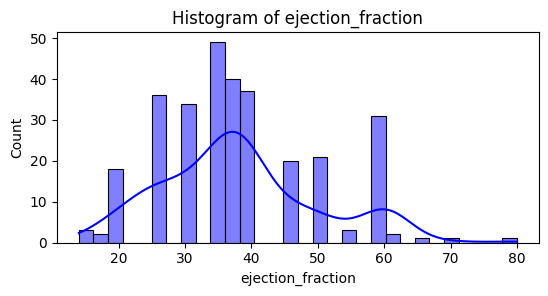

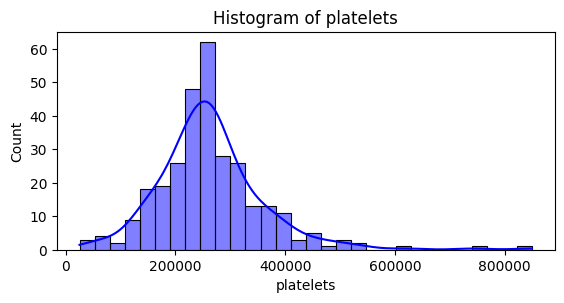

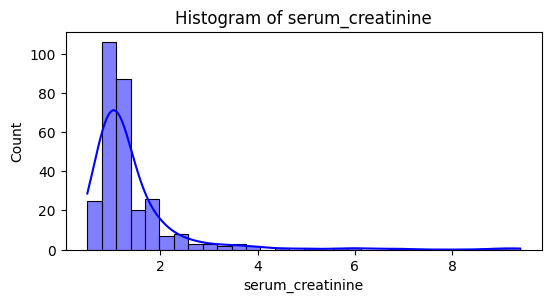

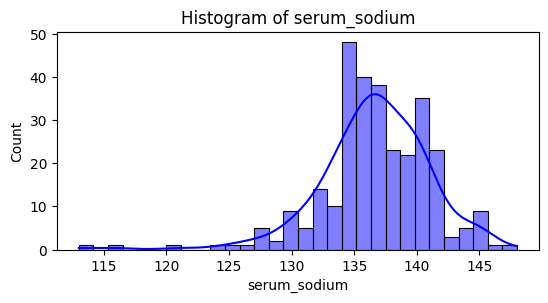

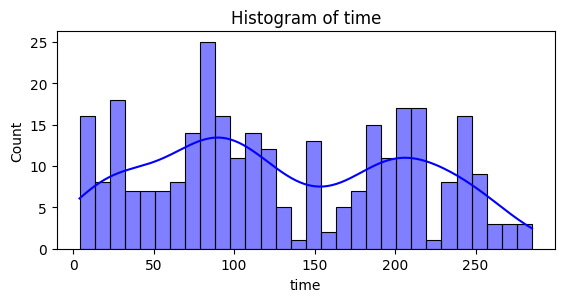

In [ ]:
for i, column in enumerate(numerical_vars, 1):
    plt.figure(figsize=(16, 8))
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True, bins=30, color='blue')
    plt.title(f"Histogram of {column}")
    plt.tight_layout()
    plt.show()

In [ ]:
outlier_info = {}
for col in numerical_vars:
    Q1, Q3 = np.percentile(df[col], [25, 75])
    IQR = Q3 - Q1
    lower_bound = max(0, Q1 - 1.5 * IQR)
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    outlier_info[col] = {
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Outliers Count": len(outliers),
    }

outliers_df = pd.DataFrame(outlier_info)
display(outliers_df.T)

,Lower Bound,Upper Bound,Outliers Count
age,22.50,98.50,0.0
creatinine_phosphokinase,0.00,1280.25,29.0
ejection_fraction,7.50,67.50,2.0
platelets,76000.00,440000.00,21.0
serum_creatinine,0.15,2.15,29.0
serum_sodium,125.00,149.00,4.0
time,0.00,398.00,0.0


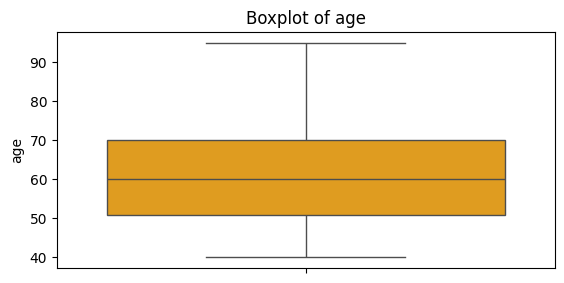

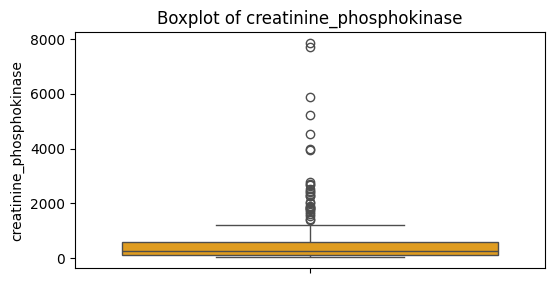

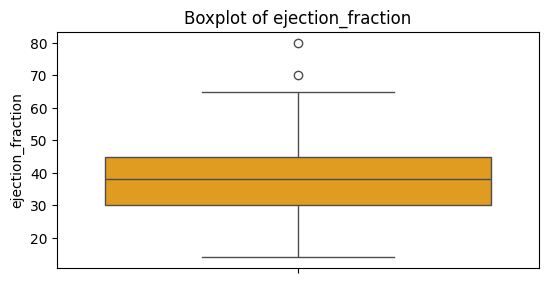

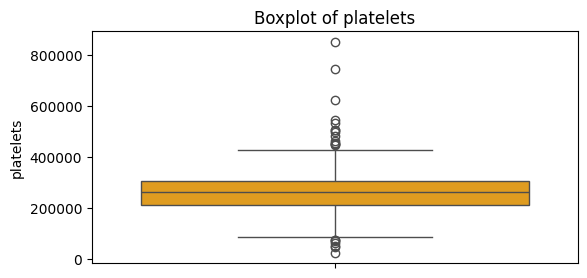

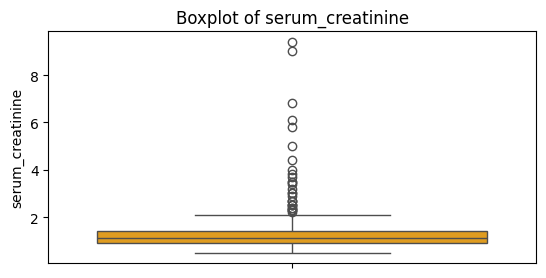

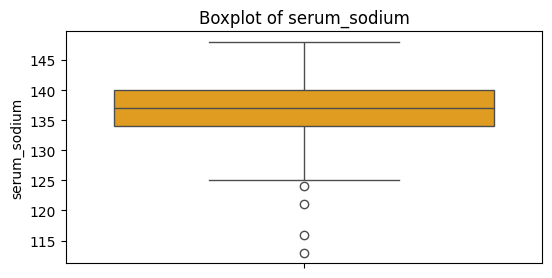

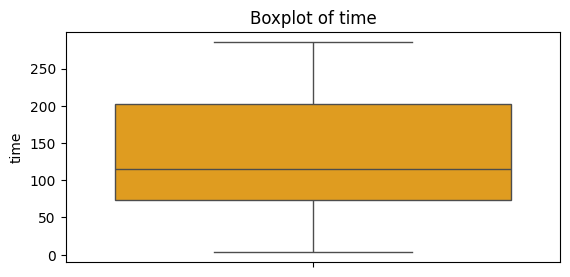

In [ ]:
for i, column in enumerate(numerical_vars, 1):
    plt.figure(figsize=(16, 8))
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column], color='orange')
    plt.title(f"Boxplot of {column}")
    plt.tight_layout()
    plt.show()

### Univariate Analysis of Categorical Variables

In [ ]:
categorical_analysis = {}

for column in categorical_vars:
    data = df[column]
    categorical_analysis[column] = {
        "Counts": data.value_counts().to_dict(),
        "Percentages": (data.value_counts(normalize=True) * 100).to_dict()
    }

categorical_analysis_df = pd.DataFrame(categorical_analysis)
display(categorical_analysis_df.T)

,Counts,Percentages
anaemia,"{0: 170, 1: 129}","{0: 56.85618729096989, 1: 43.1438127090301}"
diabetes,"{0: 174, 1: 125}","{0: 58.19397993311036, 1: 41.80602006688963}"
high_blood_pressure,"{0: 194, 1: 105}","{0: 64.88294314381271, 1: 35.11705685618729}"
sex,"{1: 194, 0: 105}","{1: 64.88294314381271, 0: 35.11705685618729}"
smoking,"{0: 203, 1: 96}","{0: 67.89297658862876, 1: 32.10702341137124}"


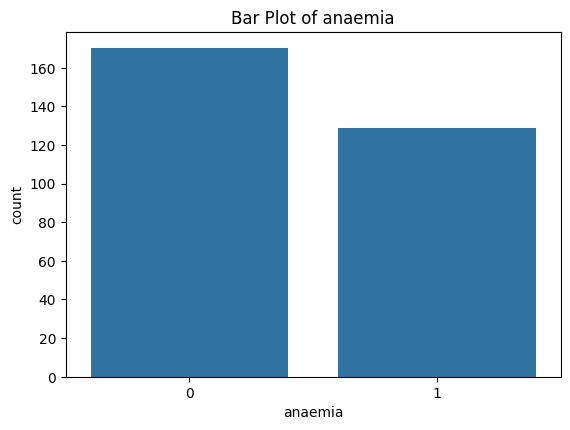

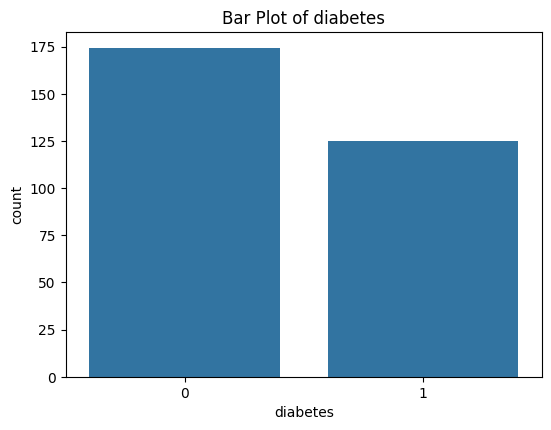

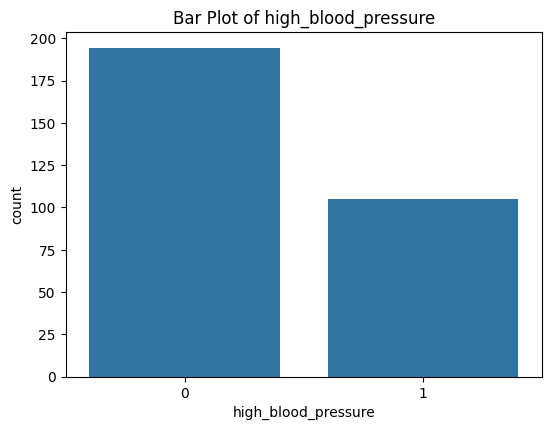

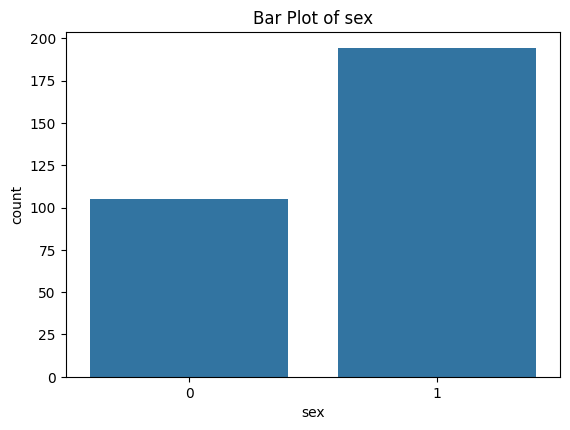

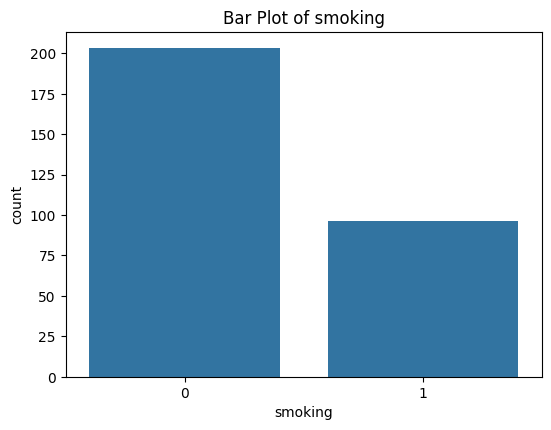

In [ ]:
for i, column in enumerate(categorical_vars, 1):
    plt.figure(figsize=(16, 8))
    plt.subplot(2, 3, i)
    sns.countplot(x=df[column])
    plt.title(f"Bar Plot of {column}")
    plt.tight_layout()
    plt.show()

### Bivariate Analysis of Categorical Variables vs Target Variable

In [ ]:
categorical_associations = []
significance_level = 0.05
for i, cat_var in enumerate(categorical_vars):
    for tar_var in target_vars:
        contingency_table = pd.crosstab(df[cat_var], df[tar_var])
        chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
        chi2_stat = chi2_stat.round(2)
        categorical_associations.append({
            "Categorical Variable": cat_var,
            "Target Variable": tar_var,
            "Chi-Square Statistic": chi2_stat,
            "p-value": p_value,
            "Association": "Significant" if p_value < significance_level else "Not Significant"
        })

categorical_associations_df = pd.DataFrame(categorical_associations)
display(categorical_associations_df)

,Categorical Variable,Target Variable,Chi-Square Statistic,p-value,Association
0,anaemia,death_event,1.04,0.307316,Not Significant
1,diabetes,death_event,0.00,1.000000,Not Significant
2,high_blood_pressure,death_event,1.54,0.214103,Not Significant
3,sex,death_event,0.00,1.000000,Not Significant
4,smoking,death_event,0.01,0.931765,Not Significant


### Bivariate Analysis of Numerical Variables vs Target Variable

#### Conduct Mann-Whitney Test

In [ ]:
group_comparisons = []
significance_level = 0.05
for num_var in numerical_vars:
    for tar_var in target_vars:
        group_0 = df[df[tar_var] == 0][num_var].dropna()
        group_1 = df[df[tar_var] == 1][num_var].dropna()
        mw_stat, mw_p = mannwhitneyu(group_0, group_1)
        group_comparisons.append({
            "Numerical Variable": num_var,
            "Target Variable": tar_var,
            "Mann-Whitney Test Statistic": mw_stat,
            "Mann-Whitney Test p-value": mw_p,
            "Difference": "Significant" if mw_p < significance_level else "Not Significant"
        })

group_comparisons_df = pd.DataFrame(group_comparisons)
display(group_comparisons_df)

,Numerical Variable,Target Variable,Mann-Whitney Test Statistic,Mann-Whitney Test p-value,Difference
0,age,death_event,7119.0,1.648395e-04,Significant
1,creatinine_phosphokinase,death_event,9460.0,6.840400e-01,Not Significant
2,ejection_fraction,death_event,13176.5,7.368249e-07,Significant
3,platelets,death_event,10300.5,4.255585e-01,Not Significant
4,serum_creatinine,death_event,5298.0,1.580998e-10,Significant
5,serum_sodium,death_event,12261.5,2.927557e-04,Significant
6,time,death_event,16288.5,6.852197e-21,Significant


## Feature Reduction

---



### Consider Numerical Variables having significant difference with Target Variable

In [ ]:
numerical_vars = ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']

### Update the dataframe by keeping only numerical variables and target variable having significant difference

In [ ]:
columns_to_keep = numerical_vars + target_vars
df = df[columns_to_keep]
df.head()

,age,ejection_fraction,serum_creatinine,serum_sodium,time,death_event
0,75,20,1.9,130,4,1
1,55,38,1.1,136,6,1
2,65,20,1.3,129,7,1
3,50,20,1.9,137,7,1
4,65,20,2.7,116,8,1


## Exploratory Data Analysis (EDA)

### Multivariate Analysis between numeric variables to check redundancy


#### Spearman’s Rank Correlation (ρ)



In [ ]:
df[numerical_vars].corr(method='spearman')

,age,ejection_fraction,serum_creatinine,serum_sodium,time
age,1.000000,0.074026,0.270645,-0.101864,-0.197540
ejection_fraction,0.074026,1.000000,-0.177986,0.161695,0.070533
serum_creatinine,0.270645,-0.177986,1.000000,-0.300413,-0.160990
serum_sodium,-0.101864,0.161695,-0.300413,1.000000,0.086393
time,-0.197540,0.070533,-0.160990,0.086393,1.000000


Text(0.5, 1.0, 'Correlation Heatmap (Spearman)')

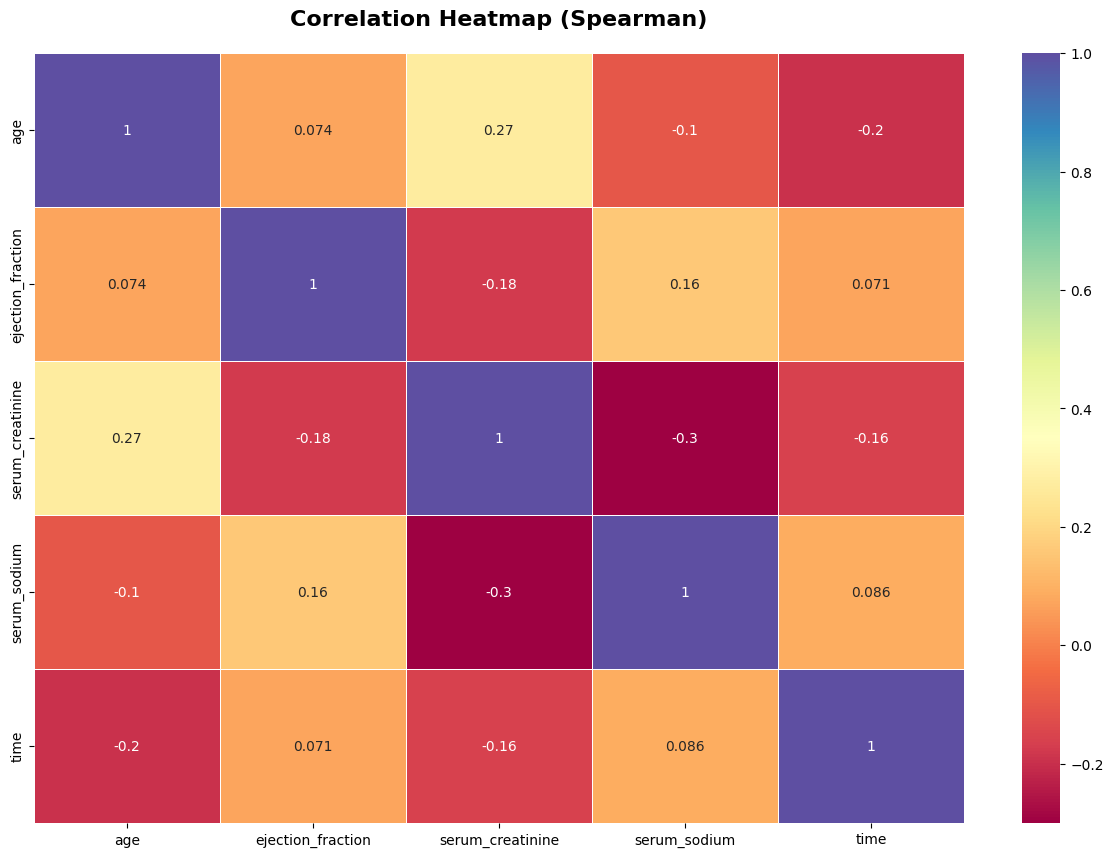

In [ ]:
plt.figure(figsize = (15, 10))
sns.heatmap(data = df[numerical_vars].corr(method='spearman'), cmap = "Spectral", annot = True, linewidths = 0.5)
plt.title("Correlation Heatmap (Spearman)", fontsize=16, fontweight='bold', pad=20)

## Model Building - Supervised Learning Approach (Logistic Regression and Decision Tree Classifier)


#### Final Dataset top five rows

In [ ]:
df.head()

,age,ejection_fraction,serum_creatinine,serum_sodium,time,death_event
0,75,20,1.9,130,4,1
1,55,38,1.1,136,6,1
2,65,20,1.3,129,7,1
3,50,20,1.9,137,7,1
4,65,20,2.7,116,8,1


#### Split features & target variable

In [ ]:
X = df.drop(columns=['death_event'])
y = df['death_event']

#### Split dataset into Train & Test (80-20 split)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### Initialize Models (Logistic Regression and Decision Tree Classifier)

In [ ]:
log_model = LogisticRegression(random_state=42)
tree_model = DecisionTreeClassifier(random_state=42, max_depth=4)  # Limit depth to prevent overfitting

#### Train Models

In [ ]:
log_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

#### Testing Models

In [ ]:
y_pred_log = log_model.predict(X_test)
y_pred_tree = tree_model.predict(X_test)

#### Compute Probabilities

In [ ]:
y_prob_log = log_model.predict_proba(X_test)[:, 1]
y_prob_tree = tree_model.predict_proba(X_test)[:, 1]

#### Evaluate Models performances by calculating metrics (Precision, Recall, F1 Score and Accuracy)

In [ ]:
def evaluate_models(models, y_true, y_preds):
    performances = {}
    for model_name, y_pred in zip(models.keys(), y_preds):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)

        performances[model_name] = {
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1
        }
    performances_df = pd.DataFrame(performances).T
    return performances_df

models = {
    "Logistic Regression": y_pred_log,
    "Decision Tree": y_pred_tree
}

performance_df = evaluate_models(models, y_test, [y_pred_log, y_pred_tree])
display(performance_df)

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.833333,0.846154,0.578947,0.687500
Decision Tree,0.816667,0.785714,0.578947,0.666667


#### Visualization of Performances comparision between Logistic Regression and Decision Tree Classifier

<Figure size 800x500 with 0 Axes>

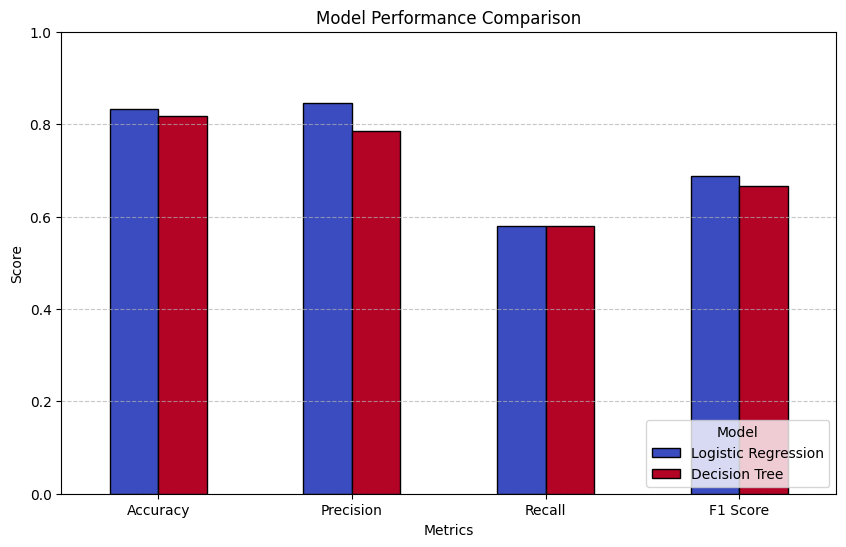

In [ ]:
model_names = ["Logistic Regression", "Decision Tree"]
metrics_labels = ["Accuracy", "Precision", "Recall", "F1 Score"]
performance_data = performance_df
df_performance = pd.DataFrame(performance_data, index=model_names, columns=metrics_labels)

plt.figure(figsize=(8, 5))
df_performance.T.plot(kind="bar", figsize=(10, 6), colormap="coolwarm", edgecolor="black")
plt.title("Model Performance Comparison")
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.legend(title="Model", loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

#### Confusion Matrix

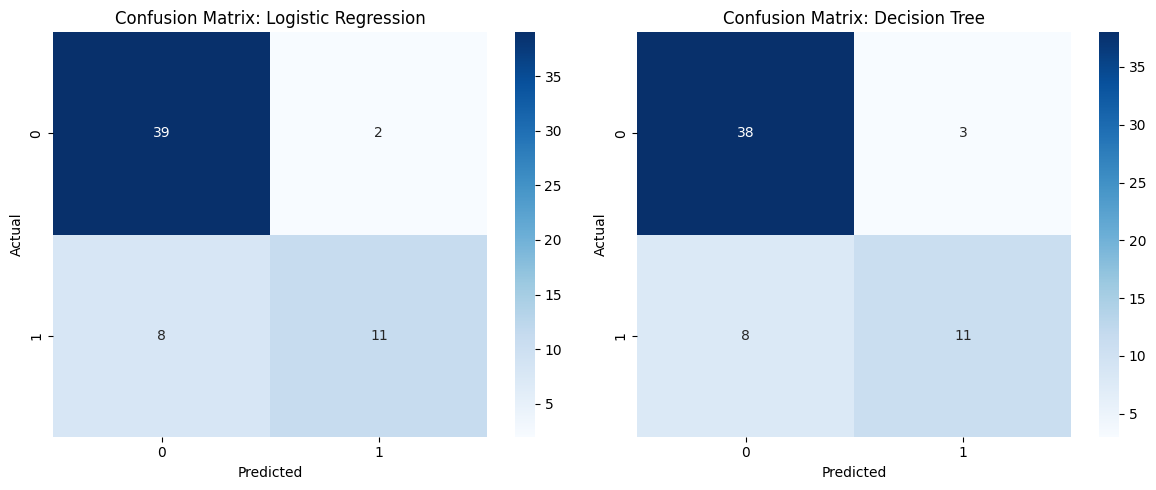

In [ ]:
plt.figure(figsize=(12, 5))

def plot_confusion_matrix(y_true, y_pred, model_name, position):
    plt.subplot(1, 2, position)
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix: {model_name}")

plot_confusion_matrix(y_test, y_pred_log, "Logistic Regression", 1)
plot_confusion_matrix(y_test, y_pred_tree, "Decision Tree", 2)
plt.tight_layout()
plt.show()